#### 엔트로피의 정의
 - 엔트로피는 확률분포가 가지는 정보의 확신도 혹은 정보량을 수치로 표현한 것이다.
 - 확률 또는 확률밀도가 특정한값에 몰려있으면 엔트로피가 작다고하고, 반대로 여러가지 값에 골고루 퍼져 있으면 엔트로피가 크다고 한다.

In [1]:
-0.5*np.log2(0.5)-0.5*np.log2(0.5) 

1.0

In [3]:
-0.8*np.log2(0.8)-0.2*np.log2(0.2)

0.7219280948873623

In [6]:
eps = np.finfo(float).eps
-1*np.log2(1) - eps*np.log2(eps) #확률값이 0일 때는 가장 작은 값인 eps를 대신사용

1.1546319456101628e-14

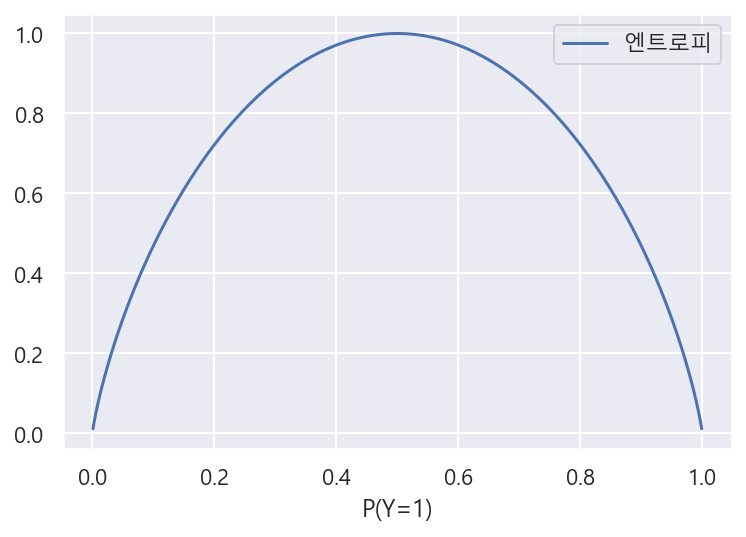

In [12]:
#연습문제
P0 = np.linspace(0.001, 1-0.001 , 1000)
P1 = 1 - P0
H = -P1*np.log2(P1)-P0*np.log2(P0)
plt.plot(P1, H,"-", label="엔트로피")
plt.xlabel("P(Y=1)")
plt.legend()
plt.show()

#### 엔트로피의 성질

- 엔트로피의 최솟값은 0
- 엔트로피의 최댓값은 클래스의 갯수가 2**K 이면 최대값은 K이다.
   예를들어 클래스가 4이면 엔트로피의 최대값은 2이다.

#### 엔트로피의 추청
- 이론적인 확률밀도함수가 없을때 실제 데이터에서는 데이터에서 확률질량함수를 만들어서 이를 기반으로 엔트로피를 계산한다.

- 사이파이의 stats 서브패키지는 엔트로피를 구하는 entropy 함수를 제공한다. base 인수값은 2가 되어야한다.


In [18]:
import scipy as sp
p = [0.5, 0.5]
sp.stats.entropy(p, base=2)

1.0

In [19]:
-(1/3)*np.log2(1/3)-(2/3)*np.log2(2/3)

0.9182958340544896

In [20]:
-(3/4)*np.log2(3/4)-(1/4)*np.log2(1/4)

0.8112781244591328

In [21]:
-(1)*np.log2(1)-(eps)*np.log2(eps)

1.1546319456101628e-14

In [27]:
#### 가변길이 인코딩
N = 200
p = [1/2, 1/4, 1/8, 1/8]
doc0 = list("".join([int(N*p[i])*c for i, c in enumerate("ABCD")]))
np.random.shuffle(doc0)
doc = "".join(doc0)
doc

'DAAAAABBDAACADABABBABABBCAAADBAAAABABAAABABBBBBAAACBACAABBCCADDADDDCAAABAACAAABABAACCAACCDABAABCABAABBCAADBDBACBDAAABBAAACDDADACBAADAAAACBBCBDCADAADDAADAAAAAABADAAADBBBBABCAABAABBACABDCCABAAAAABBAAACA'

In [30]:
encoder = {"A": "00", "B" : "01", "C":"10", "D":"11"}
encoder_doc  = "".join([encoder[c] for c in doc])
encoder_doc

'1100000000000101110000100011000100010100010001011000000011010000000001000100000001000101010101000000100100100000010110100011110011111110000000010000100000000100010000101000001010110001000001100001000001011000001101110100100111000000010100000010111100110010010000110000000010010110011110001100001111000011000000000000010011000000110101010100011000000100000101001000011110100001000000000001010000001000'

In [31]:
len(encoder_doc)

400

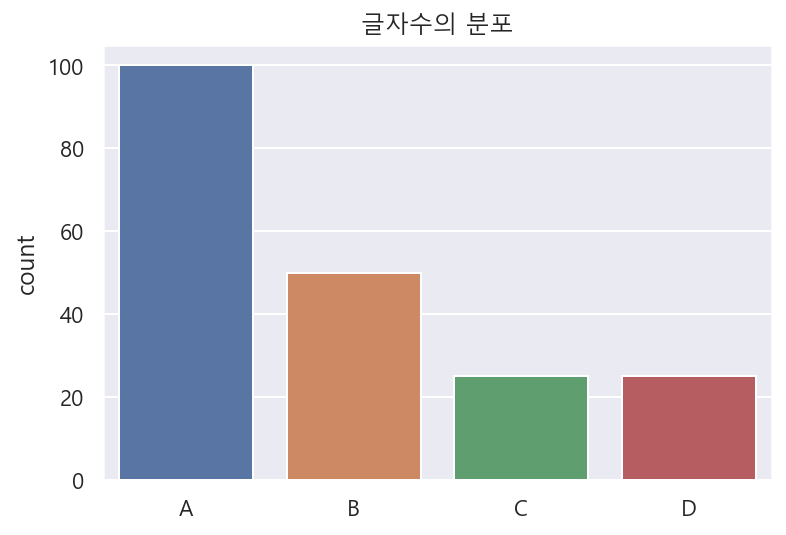

In [32]:
sns.countplot(list(doc), order="ABCD")
plt.title("글자수의 분포")
plt.show()

In [36]:
v1_encoder = {"A":"0", "B":"10", "C":"110","D":"111"}
v1_encoder_doc = "".join([v1_encoder[c] for c in doc ])
v1_encoder_doc

'11100000101011100110011101001010010010101100001111000001001000010010101010100001101001100010101101100111111011111111111000010001100001001000110110001101101110100010110010001010110001111011110011010111000101000011011111101110110100011100001101010110101111100111001111110011100000010011100011110101010010110001000101001100101111101100100000010100001100'

In [37]:
len(v1_encoder_doc)

350

In [38]:
sp.stats.entropy(p, base=2)

1.75

In [39]:
p = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64]

In [44]:
sp.stats.entropy(p, base=2)

2.0

#### 지니불순도
- 엔트로피처럼 확률분포가 어느쪽에 치우쳐있는가를 재는 척도지만 로그를 사용하지 않으므로 계산량이 적어 엔트로피 대용으로 사용한다.